In [1]:
import sys
sys.path.append('../../')

import numpy as np
import hydra

from src.util.setup import create_learner, create_setting
from src.util.metrics import variational_stability

In [2]:
path_config = "../../configs/"
setting = "single_item"
hydra.initialize(config_path=path_config + setting, job_name="run")

hydra.initialize()

In [3]:
# get parameter
learn_alg = "poga"
experiment = "fpsb"

cfg_learner = hydra.compose(config_name='learner'+learn_alg)
cfg = hydra.compose(config_name= experiment)

# create learner and setting
learner = create_learner(cfg_learner)
mechanism, game, strategies = create_setting(setting, cfg)

# compute utilities
if not mechanism.own_gradient:
    game.get_utility(mechanism)

# initialize strategies
for i in game.set_bidder:
    strategies[i].initialize(cfg_learner.init_method)

In [4]:
# run learner
learner.run(mechanism, game, strategies)

100%|████████████████████| 2.00k/2.00k [00:01<00:00, 1.14kit/s]

No convergence
Current relative utility loss 0.061 %
Best relative utility loss 0.061 %


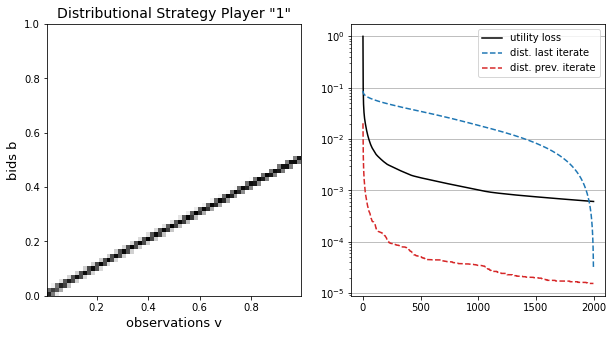

In [5]:
strategies['1'].plot(more=True)